<a id='Top of document'></a>

# UDACITY Data Analyst Nanodegree: Intro to Data Analysis Lesson 3 iPython Notebook

* [2D NumPy Arrays - Quiz 1](#2D NumPy Arrays - Quiz 1)
    * [Solution](#solquiz1)
    * [Instructor Solution](#instsolquiz1)
* [NumPy Axis - Quiz 2](#quiz2)
    * [Solution](#solquiz2)
* [Accessing Elements of a DataFrame - Quiz 3](#quiz3)
    * [Solution](#solquiz3)
    * [Pandas import of full subway dataset](#pandas import full subway dataset quiz3)
* [Calculating Correlation - Quiz 4](#quiz4)
    * [Solution](#solquiz4)
* [DataFrame Vectorized Operations - Quiz 5](#quiz5)
    * [Solution](#solquiz5)
* [DataFrame applymap() - Quiz 6](#quiz6)
    * [Solution](#solquiz6)
    * [Instructor Solution](#instsolquiz6)
* [DataFrame apply() - Quiz 7](#quiz7)
    * [Solution](#solquiz7)
    * [Instructor Solution](#instsolquiz7)
* [DataFrame apply() Use Case 2 - Quiz 8](#quiz8)
    * [Solution](#solquiz8)
    * [Instructor Solution](#instsolquiz8)
* [Adding a DataFrame to a Series - Quiz 9](#quiz9)
* [Standardizing Each Column Again - Quiz 10](#quiz10)
    * [Solution (Column)](#solquiz10col)
    * [Solution (Row)](#solquiz10row)
* [Pandas groupby() - Quiz 11](#quiz11)
* [Calculating Hourly Entries and Exits - Quiz 12](#quiz12)
    * [Solution A](#solquiz12a)
    * [Solution B](#solquiz12b)
    * [Instructor Solution](#instsolquiz12)
* [Combining Pandas DataFrames - Quiz 13](#quiz13)
    * [Solution](#solquiz13)
* [Plotting for DataFrames - Quiz 14](#quiz14)
* [Three-Dimensional Data](#3d_data)

<a id='2D NumPy Arrays - Quiz 1'></a>

# 2D NumPy Arrays - Quiz 1

In [2]:
import numpy as np

# Subway ridership for 5 stations on 10 different days
ridership = np.array([
    [   0,    0,    2,    5,    0],
    [1478, 3877, 3674, 2328, 2539],
    [1613, 4088, 3991, 6461, 2691],
    [1560, 3392, 3826, 4787, 2613],
    [1608, 4802, 3932, 4477, 2705],
    [1576, 3933, 3909, 4979, 2685],
    [  95,  229,  255,  496,  201],
    [   2,    0,    1,   27,    0],
    [1438, 3785, 3589, 4174, 2215],
    [1342, 4043, 4009, 4665, 3033]
])

In [3]:
# Change False to True for each block of code to see what it does

# Accessing elements

print(ridership[1, 3])
print(ridership[1:3, 3:5])
print(ridership[1, :])
print(ridership[:, 3])

2328
[[2328 2539]
 [6461 2691]]
[1478 3877 3674 2328 2539]
[   5 2328 6461 4787 4477 4979  496   27 4174 4665]


In [4]:
# Vectorized operations on rows or columns

print(ridership[0, :] + ridership[1, :])
print(ridership[:, 0] + ridership[:, 1])

[1478 3877 3676 2333 2539]
[   0 5355 5701 4952 6410 5509  324    2 5223 5385]


In [5]:
# Vectorized operations on entire arrays

a = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
b = np.array([[1, 1, 1], [2, 2, 2], [3, 3, 3]])
print(a + b)

[[ 2  3  4]
 [ 6  7  8]
 [10 11 12]]


In [6]:
print(np.mean(ridership))
print(np.std(ridership))
print(np.max(ridership))
print(ridership.max())
print(ridership.mean(axis=1))  # mean of each row
print(ridership.mean(axis=0))  # mean of each column
print(ridership.argmax(axis=0))

2342.6
1797.97195751
6461
6461
[  1.40000000e+00   2.77920000e+03   3.76880000e+03   3.23560000e+03
   3.50480000e+03   3.41640000e+03   2.55200000e+02   6.00000000e+00
   3.04020000e+03   3.41840000e+03]
[ 1071.2  2814.9  2718.8  3239.9  1868.2]
[2 4 9 2 9]


In [7]:
# ridership.less(axis=0)
np.less(ridership,0)

array([[False, False, False, False, False],
       [False, False, False, False, False],
       [False, False, False, False, False],
       [False, False, False, False, False],
       [False, False, False, False, False],
       [False, False, False, False, False],
       [False, False, False, False, False],
       [False, False, False, False, False],
       [False, False, False, False, False],
       [False, False, False, False, False]], dtype=bool)

In [8]:
np.where(ridership == ridership.max())

(array([2], dtype=int64), array([3], dtype=int64))

In [9]:
ridership[ridership == ridership.max()]

array([6461])

In [10]:
np.nonzero(ridership == ridership.max())[0][0]

2

In [11]:
ridership[2]

array([1613, 4088, 3991, 6461, 2691])

<a id='solquiz1'></a>

## Solution

In [12]:
def mean_riders_for_max_station(ridership):
    '''
    Fill in this function to find the station with the maximum riders on the
    first day, then return the mean riders per day for that station. Also
    return the mean ridership overall for comparsion.
    
    Hint: NumPy's argmax() function might be useful:
    http://docs.scipy.org/doc/numpy/reference/generated/numpy.argmax.html
    '''
    overall_mean = np.mean(ridership)

    first_day_station_max = np.max(ridership[0, :])
    station_column = (np.nonzero(ridership == first_day_station_max))[1][0]
    mean_for_max = np.mean(ridership[:, station_column])

    return (overall_mean, mean_for_max)

print mean_riders_for_max_station(ridership)

(2342.5999999999999, 3239.9000000000001)


<a id='instsolquiz1'></a>

## Solution - Instructor

In [13]:
def mean_riders_for_max_station(ridership):
    '''
    Fill in this function to find the station with the maximum riders on the
    first day, then return the mean riders per day for that station. Also
    return the mean ridership overall for comparsion.
    
    Hint: NumPy's argmax() function might be useful:
    http://docs.scipy.org/doc/numpy/reference/generated/numpy.argmax.html
    '''
    overall_mean = ridership.mean()
    max_station = ridership[0, :].argmax()
    mean_for_max = ridership[:, max_station].mean()
    
    return (overall_mean, mean_for_max)

print mean_riders_for_max_station(ridership)

(2342.5999999999999, 3239.9000000000001)


[Back to top](#Top of document)
<a id='quiz2'></a>

## NumPy Axis - Quiz 2

In [14]:
print('Mean Ridership per day:'), ridership.mean(axis=1)  # mean of each row
print('Mean Ridership per station:'), ridership.mean(axis=0)  # mean of each column

Mean Ridership per day: [  1.40000000e+00   2.77920000e+03   3.76880000e+03   3.23560000e+03
   3.50480000e+03   3.41640000e+03   2.55200000e+02   6.00000000e+00
   3.04020000e+03   3.41840000e+03]
Mean Ridership per station: [ 1071.2  2814.9  2718.8  3239.9  1868.2]


<a id='solquiz2'></a>

## Solution

In [15]:
def min_and_max_riders_per_day(ridership):
    """
    Fill in this function. First, for each subway station, calculate the
    mean ridership per day. Then, out of all the subway stations, return the
    maximum and minimum of these values. That is, find the maximum
    mean-ridership-per-day and the minimum mean-ridership-per-day for any
    subway station.
    """

    max_daily_ridership = (ridership.mean(axis=0)).max()
    min_daily_ridership = (ridership.mean(axis=0)).min()

    return max_daily_ridership, min_daily_ridership

print(min_and_max_riders_per_day(ridership))

(3239.9000000000001, 1071.2)


[Back to top](#Top of document)
<a id='quiz3'></a>

## Accessing Elements of a DataFrame - Quiz 3

In [16]:
import pandas as pd

# Subway ridership for 5 stations on 10 different days
ridership_df = pd.DataFrame(
    data=[[   0,    0,    2,    5,    0],
          [1478, 3877, 3674, 2328, 2539],
          [1613, 4088, 3991, 6461, 2691],
          [1560, 3392, 3826, 4787, 2613],
          [1608, 4802, 3932, 4477, 2705],
          [1576, 3933, 3909, 4979, 2685],
          [  95,  229,  255,  496,  201],
          [   2,    0,    1,   27,    0],
          [1438, 3785, 3589, 4174, 2215],
          [1342, 4043, 4009, 4665, 3033]],
    index=['05-01-11', '05-02-11', '05-03-11', '05-04-11', '05-05-11',
           '05-06-11', '05-07-11', '05-08-11', '05-09-11', '05-10-11'],
    columns=['R003', 'R004', 'R005', 'R006', 'R007']
)

In [17]:
ridership_df.head()

,R003,R004,R005,R006,R007
05-01-11,0,0,2,5,0
05-02-11,1478,3877,3674,2328,2539
05-03-11,1613,4088,3991,6461,2691
05-04-11,1560,3392,3826,4787,2613
05-05-11,1608,4802,3932,4477,2705


In [18]:
# DataFrame creation

# You can create a DataFrame out of a dictionary mapping column names to values
df_1 = pd.DataFrame({'A': [0, 1, 2], 'B': [3, 4, 5]})
print df_1

# You can also use a list of lists or a 2D NumPy array
df_2 = pd.DataFrame([[0, 1, 2], [3, 4, 5]], columns=['A', 'B', 'C'])
print df_2

   A  B
0  0  3
1  1  4
2  2  5
   A  B  C
0  0  1  2
1  3  4  5


In [19]:
# Accessing elements

print ridership_df.iloc[0]
print ridership_df.loc['05-05-11']
print ridership_df['R003']
print ridership_df.iloc[1, 3]

R003    0
R004    0
R005    2
R006    5
R007    0
Name: 05-01-11, dtype: int64
R003    1608
R004    4802
R005    3932
R006    4477
R007    2705
Name: 05-05-11, dtype: int64
05-01-11       0
05-02-11    1478
05-03-11    1613
05-04-11    1560
05-05-11    1608
05-06-11    1576
05-07-11      95
05-08-11       2
05-09-11    1438
05-10-11    1342
Name: R003, dtype: int64
2328


In [20]:
# Accessing multiple rows

print ridership_df.iloc[1:4]

          R003  R004  R005  R006  R007
05-02-11  1478  3877  3674  2328  2539
05-03-11  1613  4088  3991  6461  2691
05-04-11  1560  3392  3826  4787  2613


In [21]:
# Accessing multiple columns

print ridership_df[['R003', 'R005']]

          R003  R005
05-01-11     0     2
05-02-11  1478  3674
05-03-11  1613  3991
05-04-11  1560  3826
05-05-11  1608  3932
05-06-11  1576  3909
05-07-11    95   255
05-08-11     2     1
05-09-11  1438  3589
05-10-11  1342  4009


In [22]:
# Pandas axis

df = pd.DataFrame({'A': [0, 1, 2], 'B': [3, 4, 5]})
print df.sum()
print df.sum(axis=1)
print df.values.sum()

A     3
B    12
dtype: int64
0    3
1    5
2    7
dtype: int64
15


In [23]:
print('Station Mean:\n'), ridership_df.mean()
print('Overall Mean:\n'), np.mean(ridership_df.mean())
print('Overall Mean:\n'), (ridership_df.mean()).mean(axix=0)

Station Mean:
R003    1071.2
R004    2814.9
R005    2718.8
R006    3239.9
R007    1868.2
dtype: float64
Overall Mean:
2342.6
Overall Mean:
2342.6


In [24]:
ridership_df.max()

R003    1613
R004    4802
R005    4009
R006    6461
R007    3033
dtype: int64

In [25]:
stats_df = ridership_df.describe()
print(stats_df)

              R003         R004         R005        R006         R007
count    10.000000    10.000000    10.000000    10.00000    10.000000
mean   1071.200000  2814.900000  2718.800000  3239.90000  1868.200000
std     722.067679  1922.501984  1822.843798  2342.24951  1259.895216
min       0.000000     0.000000     1.000000     5.00000     0.000000
25%     406.750000  1019.750000  1088.500000   954.00000   704.500000
50%    1458.000000  3831.000000  3750.000000  4325.50000  2576.000000
75%    1572.000000  4015.500000  3926.250000  4756.50000  2689.500000
max    1613.000000  4802.000000  4009.000000  6461.00000  3033.000000


In [26]:
print((stats_df.loc['mean']).mean(axix=1))
print(stats_df.loc['mean'].values.mean())

2342.6
2342.6


In [27]:
print(ridership_df.columns)
print(ridership_df.index)

Index([u'R003', u'R004', u'R005', u'R006', u'R007'], dtype='object')
Index([u'05-01-11', u'05-02-11', u'05-03-11', u'05-04-11', u'05-05-11',
       u'05-06-11', u'05-07-11', u'05-08-11', u'05-09-11', u'05-10-11'],
      dtype='object')


In [28]:
print(ridership_df.loc['05-01-11'].argmax())

R006


<a id='solquiz3'></a>

## Solution

In [29]:
def mean_riders_for_max_station(ridership):
    """
    Fill in this function to find the station with the maximum riders on the
    first day, then return the mean riders per day for that station. Also
    return the mean ridership overall for comparsion.
    
    This is the same as a previous exercise, but this time the
    input is a Pandas DataFrame rather than a 2D NumPy array.
    """
    overall_mean = (ridership.mean()).mean(axis=0)  # or ridership.mean().values.mean()
    loc_1st_max = ridership.iloc[0].argmax()
    mean_for_max = ridership[loc_1st_max].mean()
    
    return (overall_mean, mean_for_max)

print(mean_riders_for_max_station(ridership_df))

(2342.6000000000004, 3239.9)


<a id='pandas import full subway dataset quiz3'></a>

## Pandas import of full subway dataset

In [30]:
import pandas as pd

#data_path = 'C:/Users/Trenton J. McKinney/PycharmProjects/' \
#            'UDACITY/01_Data_Analyst/02_Data_Analysis/L3/'
data_path = ('E:/Users/Trenton J. McKinney/PycharmProjects/'
              'UDACITY/01_Data_Analyst/02_Data_Analysis/L3/')
subway_df = pd.read_csv(data_path + 'nyc_subway_weather.csv')
print(subway_df.head())

   UNIT     DATEn     TIMEn  ENTRIESn   EXITSn  ENTRIESn_hourly  \
0  R003  05-01-11  00:00:00   4388333  2911002                0   
1  R003  05-01-11  04:00:00   4388333  2911002                0   
2  R003  05-01-11  12:00:00   4388333  2911002                0   
3  R003  05-01-11  16:00:00   4388333  2911002                0   
4  R003  05-01-11  20:00:00   4388333  2911002                0   

   EXITSn_hourly             datetime  hour  day_week     ...       pressurei  \
0              0  2011-05-01 00:00:00     0         6     ...           30.22   
1              0  2011-05-01 04:00:00     4         6     ...           30.25   
2              0  2011-05-01 12:00:00    12         6     ...           30.28   
3              0  2011-05-01 16:00:00    16         6     ...           30.26   
4              0  2011-05-01 20:00:00    20         6     ...           30.28   

  rain  tempi  wspdi meanprecipi  meanpressurei  meantempi  meanwspdi  \
0    0   55.9    3.5           0     

In [31]:
print(len(subway_df))
print(subway_df.columns)

42649
Index([u'UNIT', u'DATEn', u'TIMEn', u'ENTRIESn', u'EXITSn', u'ENTRIESn_hourly',
       u'EXITSn_hourly', u'datetime', u'hour', u'day_week', u'weekday',
       u'station', u'latitude', u'longitude', u'conds', u'fog', u'precipi',
       u'pressurei', u'rain', u'tempi', u'wspdi', u'meanprecipi',
       u'meanpressurei', u'meantempi', u'meanwspdi', u'weather_lat',
       u'weather_lon'],
      dtype='object')


In [32]:
# print(subway_df.describe())  # prints all of the columns
subway_df.describe()

,ENTRIESn,EXITSn,ENTRIESn_hourly,EXITSn_hourly,hour,day_week,weekday,latitude,longitude,fog,...,pressurei,rain,tempi,wspdi,meanprecipi,meanpressurei,meantempi,meanwspdi,weather_lat,weather_lon
count,4.264900e+04,4.264900e+04,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,...,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000
mean,2.812486e+07,1.986993e+07,1886.589955,1361.487866,10.046754,2.905719,0.714436,40.724647,-73.940364,0.009824,...,29.971096,0.224741,63.103780,6.927872,0.004618,29.971096,63.103780,6.927872,40.728555,-73.938693
std,3.043607e+07,2.028986e+07,2952.385585,2183.845409,6.938928,2.079231,0.451688,0.071650,0.059713,0.098631,...,0.137942,0.417417,8.455597,4.510178,0.016344,0.131158,6.939011,3.179832,0.065420,0.059582
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,40.576152,-74.073622,0.000000,...,29.550000,0.000000,46.900000,0.000000,0.000000,29.590000,49.400000,0.000000,40.600204,-74.014870
25%,1.039762e+07,7.613712e+06,274.000000,237.000000,4.000000,1.000000,0.000000,40.677107,-73.987342,0.000000,...,29.890000,0.000000,57.000000,4.600000,0.000000,29.913333,58.283333,4.816667,40.688591,-73.985130
50%,1.818389e+07,1.331609e+07,905.000000,664.000000,12.000000,3.000000,1.000000,40.717241,-73.953459,0.000000,...,29.960000,0.000000,61.000000,6.900000,0.000000,29.958000,60.950000,6.166667,40.720570,-73.949150
75%,3.263049e+07,2.393771e+07,2255.000000,1537.000000,16.000000,5.000000,1.000000,40.759123,-73.907733,0.000000,...,30.060000,0.000000,69.100000,9.200000,0.000000,30.060000,67.466667,8.850000,40.755226,-73.912033
max,2.357746e+08,1.493782e+08,32814.000000,34828.000000,20.000000,6.000000,1.000000,40.889185,-73.755383,1.000000,...,30.320000,1.000000,86.000000,23.000000,0.157500,30.293333,79.800000,17.083333,40.862064,-73.694176


[Back to top](#Top of document)
<a id='quiz4'></a>

## Calculating Correlation - Quiz 4

In [33]:
entries = subway_df['ENTRIESn_hourly']
cum_entries = subway_df['ENTRIESn']
rain = subway_df['meanprecipi']
temp = subway_df['meantempi']

In [34]:
temp.std(ddof=0)

6.9389299079882365

In [35]:
rain_std = ((rain - rain.mean()) / rain.std(ddof=0))
entries_std = ((entries - entries.mean()) / entries.std(ddof=0))
temp_std = ((temp - temp.mean()) / temp.std(ddof=0))
cum_entries_std = ((cum_entries - cum_entries.mean()) / cum_entries.std(ddof=0))
print(rain_std)

0       -0.282530
1       -0.282530
2       -0.282530
3       -0.282530
4       -0.282530
5       -0.282530
6       -0.282530
7       -0.282530
8       -0.282530
9       -0.282530
10      -0.282530
11      -0.282530
12      -0.282530
13      -0.282530
14      -0.282530
15      -0.282530
16       0.329313
17       0.329313
18       0.329313
19       0.329313
20       0.329313
21       0.329313
22      -0.282530
23      -0.282530
24      -0.282530
25      -0.282530
26      -0.282530
27      -0.282530
28      -0.282530
29      -0.282530
           ...   
42619   -0.282530
42620   -0.282530
42621   -0.282530
42622   -0.282530
42623   -0.282530
42624   -0.282530
42625   -0.282530
42626   -0.282530
42627   -0.282530
42628   -0.282530
42629   -0.282530
42630   -0.282530
42631   -0.282530
42632   -0.282530
42633   -0.282530
42634   -0.282530
42635   -0.282530
42636   -0.282530
42637   -0.180557
42638   -0.180557
42639   -0.180557
42640   -0.180557
42641   -0.180557
42642   -0.180557
42643   -0

<a id='solquiz4'></a>

## Solution

In [31]:
def correlation(x, y):
    """
    Fill in this function to compute the correlation between the two
    input variables. Each input is either a NumPy array or a Pandas
    Series.
    
    correlation = average of (x in standard units) times (y in standard units)
    
    Remember to pass the argument "ddof=0" to the Pandas std() function!
    """
    
    x_std = ((x - x.mean()) / x.std(ddof=0))
    y_std = ((y - y.mean()) / y.std(ddof=0))
    
    r = (x_std * y_std).mean()
    
    return(r)

entries = subway_df['ENTRIESn_hourly']
cum_entries = subway_df['ENTRIESn']
rain = subway_df['meanprecipi']
temp = subway_df['meantempi']

print correlation(entries, rain)
print correlation(entries, temp)
print correlation(rain, temp)

print correlation(entries, cum_entries)

0.0356485157722
-0.0266933483216
-0.229034323408
0.585895470766


[Back to top](#Top of document)
<a id='quiz5'></a>

## DataFrame Vectorized Operations - Quiz 5

In [37]:
import pandas as pd

# Cumulative entries and exits for one station for a few hours
entries_and_exits = pd.DataFrame({
    'ENTRIESn': [3144312, 3144335, 3144353, 3144424, 3144594,
                 3144808, 3144895, 3144905, 3144941, 3145094],
    'EXITSn': [1088151, 1088159, 1088177, 1088231, 1088275,
               1088317, 1088328, 1088331, 1088420, 1088753]
})
print(entries_and_exits)

   ENTRIESn   EXITSn
0   3144312  1088151
1   3144335  1088159
2   3144353  1088177
3   3144424  1088231
4   3144594  1088275
5   3144808  1088317
6   3144895  1088328
7   3144905  1088331
8   3144941  1088420
9   3145094  1088753


In [38]:
entries_and_exits - entries_and_exits.shift()

,ENTRIESn,EXITSn
0,NaN,NaN
1,23,8
2,18,18
3,71,54
4,170,44
5,214,42
6,87,11
7,10,3
8,36,89
9,153,333


In [39]:
# Adding DataFrames with the column names
df1 = pd.DataFrame({'a': [1, 2, 3], 'b': [4, 5, 6], 'c': [7, 8, 9]})
df2 = pd.DataFrame({'a': [10, 20, 30], 'b': [40, 50, 60], 'c': [70, 80, 90]})
print df1 + df2

    a   b   c
0  11  44  77
1  22  55  88
2  33  66  99


In [40]:
# Adding DataFrames with overlapping column names 
df1 = pd.DataFrame({'a': [1, 2, 3], 'b': [4, 5, 6], 'c': [7, 8, 9]})
df2 = pd.DataFrame({'d': [10, 20, 30], 'c': [40, 50, 60], 'b': [70, 80, 90]})
print df1 + df2

    a   b   c   d
0 NaN  74  47 NaN
1 NaN  85  58 NaN
2 NaN  96  69 NaN


In [41]:
# Adding DataFrames with overlapping row indexes
df1 = pd.DataFrame({'a': [1, 2, 3], 'b': [4, 5, 6], 'c': [7, 8, 9]},
                   index=['row1', 'row2', 'row3'])
df2 = pd.DataFrame({'a': [10, 20, 30], 'b': [40, 50, 60], 'c': [70, 80, 90]},
                   index=['row4', 'row3', 'row2'])
print df1 + df2

       a   b   c
row1 NaN NaN NaN
row2  32  65  98
row3  23  56  89
row4 NaN NaN NaN


<a id='solquiz5'></a>

## Solution

In [42]:
def get_hourly_entries_and_exits(entries_and_exits):
    """
    Fill in this function to take a DataFrame with cumulative entries
    and exits (entries in the first column, exits in the second) and
    return a DataFrame with hourly entries and exits (entries in the
    first column, exits in the second).
    """
    
    hourly = entries_and_exits - entries_and_exits.shift()
    
    return(hourly)

print(get_hourly_entries_and_exits(entries_and_exits))

   ENTRIESn  EXITSn
0       NaN     NaN
1        23       8
2        18      18
3        71      54
4       170      44
5       214      42
6        87      11
7        10       3
8        36      89
9       153     333


[Back to top](#Top of document)
<a id='quiz6'></a>

## DataFrame applymap() - Quiz 6

In [43]:
import pandas as pd

# DataFrame applymap()
df = pd.DataFrame({
    'a': [1, 2, 3],
    'b': [10, 20, 30],
    'c': [5, 10, 15]
})

def add_one(x):
    return x + 1
    
print df.applymap(add_one)

   a   b   c
0  2  11   6
1  3  21  11
2  4  31  16


In [44]:
grades_df = pd.DataFrame(
    data={'exam1': [43, 81, 78, 75, 89, 70, 91, 65, 98, 87],
          'exam2': [24, 63, 56, 56, 67, 51, 79, 46, 72, 60]},
    index=['Andre', 'Barry', 'Chris', 'Dan', 'Emilio', 
           'Fred', 'Greta', 'Humbert', 'Ivan', 'James']
)

print(grades_df)

         exam1  exam2
Andre       43     24
Barry       81     63
Chris       78     56
Dan         75     56
Emilio      89     67
Fred        70     51
Greta       91     79
Humbert     65     46
Ivan        98     72
James       87     60


<a id='solquiz6'></a>

## Solution

In [45]:
def convert_grade(grade):
    """
    Fill in this function to convert the given DataFrame of numerical
    grades to letter grades. Return a new DataFrame with the converted
    grade.
    
    The conversion rule is:
        90-100 -> A
        80-89  -> B
        70-79  -> C
        60-69  -> D
        0-59   -> F
    """

    if grade >= 90:
        letter_grades = 'A'
    elif grade >= 80:
        letter_grades = 'B'
    elif grade >= 70:
        letter_grades = 'C'
    elif grade >= 60:
        letter_grades = 'D'
    else:
        letter_grades = 'F'

    return(letter_grades)

print(grades_df.applymap(convert_grade))

        exam1 exam2
Andre       F     F
Barry       B     D
Chris       C     F
Dan         C     F
Emilio      B     D
Fred        C     F
Greta       A     C
Humbert     D     F
Ivan        A     C
James       B     D


<a id='instsolquiz6'></a>

## Required for the grader to work (as of this writing)

In [46]:
def convert_grades(grades):
    return grades.applymap(convert_grade)

print(convert_grades(grades_df))

        exam1 exam2
Andre       F     F
Barry       B     D
Chris       C     F
Dan         C     F
Emilio      B     D
Fred        C     F
Greta       A     C
Humbert     D     F
Ivan        A     C
James       B     D


[Back to top](#Top of document)
<a id='quiz7'></a>

## DataFrame apply() - Quiz 7

In [33]:
import pandas as pd

grades_df = pd.DataFrame(
    data={'exam1': [43, 81, 78, 75, 89, 70, 91, 65, 98, 87],
          'exam2': [24, 63, 56, 56, 67, 51, 79, 46, 72, 60]},
    index=['Andre', 'Barry', 'Chris', 'Dan', 'Emilio', 
           'Fred', 'Greta', 'Humbert', 'Ivan', 'James']
)

In [34]:
# DataFrame apply()

def convert_grades_curve(exam_grades):
    # Pandas has a bult-in function that will perform this calculation
    # This will give the bottom 0% to 10% of students the grade 'F',
    # 10% to 20% the grade 'D', and so on. You can read more about
    # the qcut() function here:
    # http://pandas.pydata.org/pandas-docs/stable/generated/pandas.qcut.html
    return pd.qcut(exam_grades,
                   [0, 0.1, 0.2, 0.5, 0.8, 1],
                   labels=['F', 'D', 'C', 'B', 'A'])

# qcut() operates on a list, array, or Series. This is the
# result of running the function on a single column of the
# DataFrame.
print convert_grades_curve(grades_df['exam1'])

# qcut() does not work on DataFrames, but we can use apply()
# to call the function on each column separately
print grades_df.apply(convert_grades_curve)

Andre      F
Barry      B
Chris      C
Dan        C
Emilio     B
Fred       C
Greta      A
Humbert    D
Ivan       A
James      B
Name: exam1, dtype: category
Categories (5, object): [F < D < C < B < A]
        exam1 exam2
Andre       F     F
Barry       B     B
Chris       C     C
Dan         C     C
Emilio      B     B
Fred        C     C
Greta       A     A
Humbert     D     D
Ivan        A     A
James       B     B


In [35]:
grades_df['exam1'].mean()

77.7

In [36]:
print(grades_df.mean()[0])
print(grades_df.mean()[1])
print(grades_df.mean())

77.7
57.4
exam1    77.7
exam2    57.4
dtype: float64


In [37]:
grades_df.std()

exam1    15.797679
exam2    15.276707
dtype: float64

<a id='solquiz7'></a>

## Solution

In [38]:
def standardize(df):
    '''
    Fill in this function to standardize each column of the given
    DataFrame. To standardize a variable, convert each value to the
    number of standard deviations it is above or below the mean.
    '''
    
    return((df-df.mean())/df.std(ddof=0)) 

print grades_df.apply(standardize)

            exam1     exam2
Andre   -2.315341 -2.304599
Barry    0.220191  0.386400
Chris    0.020017 -0.096600
Dan     -0.180156 -0.096600
Emilio   0.753987  0.662400
Fred    -0.513779 -0.441600
Greta    0.887436  1.490400
Humbert -0.847401 -0.786600
Ivan     1.354508  1.007400
James    0.620538  0.179400


<a id='instsolquiz7'></a>

## Solution from Instructor

In [39]:
def standardize_column(column):
    return((column-column.mean())/column.std(ddof=0))

def standardize(df):
    return(df.apply(standardize_column))

print(standardize(grades_df))

            exam1     exam2
Andre   -2.315341 -2.304599
Barry    0.220191  0.386400
Chris    0.020017 -0.096600
Dan     -0.180156 -0.096600
Emilio   0.753987  0.662400
Fred    -0.513779 -0.441600
Greta    0.887436  1.490400
Humbert -0.847401 -0.786600
Ivan     1.354508  1.007400
James    0.620538  0.179400


[Back to top](#Top of document)
<a id='quiz8'></a>

## DataFrame apply() Use Case 2 - Quiz 8

In [54]:
import numpy as np
import pandas as pd

df = pd.DataFrame({
    'a': [4, 5, 3, 1, 2],
    'b': [20, 10, 40, 50, 30],
    'c': [25, 20, 5, 15, 10]
})

In [55]:
# DataFrame apply() - use case 2
 
print df.apply(np.mean)
print df.apply(np.max)
print(df.max())

a     3
b    30
c    15
dtype: float64
a     5
b    50
c    25
dtype: int64
a     5
b    50
c    25
dtype: int64


<a id='solquiz8'></a>

## Solution

In [56]:
def second_largest_column(column):
    """
    Fill in this function to return the second-largest value of each 
    column of the input DataFrame.
    """

    max_val = column.max()
    df_list = []
    for value in column:  # bad option for large datasets; has to iterate through all values
        if value - max_val != 0:
            df_list.append(value)
    return max(df_list)

def second_largest(df):
    return (df.apply(second_largest_column))

print(second_largest(df))

a     4
b    40
c    20
dtype: int64


In [57]:
def second_largest_column(column):
    """
    Fill in this function to return the second-largest value of each 
    column of the input DataFrame.
    
    http://docs.scipy.org/doc/numpy/reference/maskedarray.generic.html
    """

    return(np.max(np.ma.masked_array(column, column == column.max())))

    
def second_largest(df):
    return (df.apply(second_largest_column))

print(second_largest(df))

a     4
b    40
c    20
dtype: int64


<a id='instsolquiz8'></a>

## Solution - Instructor

In [58]:
def second_largest_in_column(column):
    """
    Fill in this function to return the second-largest value of each 
    column of the input DataFrame.
    """

    return((column.sort_values(ascending=False)).iloc[1])
    
def second_largest(df):
    return(df.apply(second_largest_in_column))

print(second_largest(df))

a     4
b    40
c    20
dtype: int64


[Back to top](#Top of document)
<a id='quiz9'></a>

## Adding a DataFrame to a Series - Quiz 9

In [59]:
import pandas as pd

# Adding a Series to a square DataFrame
s = pd.Series([1, 2, 3, 4])
df = pd.DataFrame({
    0: [10, 20, 30, 40],
    1: [50, 60, 70, 80],
    2: [90, 100, 110, 120],
    3: [130, 140, 150, 160]
})

print df
print ''  # Create a blank line between outputs
print df + s

    0   1    2    3
0  10  50   90  130
1  20  60  100  140
2  30  70  110  150
3  40  80  120  160

    0   1    2    3
0  11  52   93  134
1  21  62  103  144
2  31  72  113  154
3  41  82  123  164


In [60]:
# Adding a Series to a one-row DataFrame 
s = pd.Series([1, 2, 3, 4])
df = pd.DataFrame({0: [10], 1: [20], 2: [30], 3: [40]})

print df
print ''  # Create a blank line between outputs
print df + s

    0   1   2   3
0  10  20  30  40

    0   1   2   3
0  11  22  33  44


In [61]:
# Adding a Series to a one-column DataFrame
s = pd.Series([1, 2, 3, 4])
df = pd.DataFrame({0: [10, 20, 30, 40]})

print df
print ''  # Create a blank line between outputs
print df + s

    0
0  10
1  20
2  30
3  40

    0   1   2   3
0  11 NaN NaN NaN
1  21 NaN NaN NaN
2  31 NaN NaN NaN
3  41 NaN NaN NaN


In [62]:
# Adding when DataFrame column names match Series index
s = pd.Series([1, 2, 3, 4], index=['a', 'b', 'c', 'd'])
df = pd.DataFrame({
    'a': [10, 20, 30, 40],
    'b': [50, 60, 70, 80],
    'c': [90, 100, 110, 120],
    'd': [130, 140, 150, 160]
})

print df
print ''  # Create a blank line between outputs
print df + s

    a   b    c    d
0  10  50   90  130
1  20  60  100  140
2  30  70  110  150
3  40  80  120  160

    a   b    c    d
0  11  52   93  134
1  21  62  103  144
2  31  72  113  154
3  41  82  123  164


In [63]:
# Adding when DataFrame column names don't match Series index
s = pd.Series([1, 2, 3, 4])
df = pd.DataFrame({
    'a': [10, 20, 30, 40],
    'b': [50, 60, 70, 80],
    'c': [90, 100, 110, 120],
    'd': [130, 140, 150, 160]
})

print df
print ''  # Create a blank line between outputs
print df + s

    a   b    c    d
0  10  50   90  130
1  20  60  100  140
2  30  70  110  150
3  40  80  120  160

    0   1   2   3   a   b   c   d
0 NaN NaN NaN NaN NaN NaN NaN NaN
1 NaN NaN NaN NaN NaN NaN NaN NaN
2 NaN NaN NaN NaN NaN NaN NaN NaN
3 NaN NaN NaN NaN NaN NaN NaN NaN


### No code to write for the Quiz 9 section; just run the examples.

[Back to top](#Top of document)
<a id='quiz10'></a>

## Standardizing Each Column Again - Quiz 10

In [64]:
import pandas as pd

# Adding using +

s = pd.Series([1, 2, 3, 4])
df = pd.DataFrame({
    0: [10, 20, 30, 40],
    1: [50, 60, 70, 80],
    2: [90, 100, 110, 120],
    3: [130, 140, 150, 160]
})

print df
print ''  # Create a blank line between outputs
print df + s

    0   1    2    3
0  10  50   90  130
1  20  60  100  140
2  30  70  110  150
3  40  80  120  160

    0   1    2    3
0  11  52   93  134
1  21  62  103  144
2  31  72  113  154
3  41  82  123  164


In [65]:
# Adding with axis='index'

s = pd.Series([1, 2, 3, 4])
df = pd.DataFrame({
    0: [10, 20, 30, 40],
    1: [50, 60, 70, 80],
    2: [90, 100, 110, 120],
    3: [130, 140, 150, 160]
})

print df
print ''  # Create a blank line between outputs
print df.add(s, axis='index')
# The functions sub(), mul(), and div() work similarly to add()

    0   1    2    3
0  10  50   90  130
1  20  60  100  140
2  30  70  110  150
3  40  80  120  160

    0   1    2    3
0  11  51   91  131
1  22  62  102  142
2  33  73  113  153
3  44  84  124  164


In [66]:
# Adding with axis='columns'


s = pd.Series([1, 2, 3, 4])
df = pd.DataFrame({
    0: [10, 20, 30, 40],
    1: [50, 60, 70, 80],
    2: [90, 100, 110, 120],
    3: [130, 140, 150, 160]
})

print df
print ''  # Create a blank line between outputs
print df.add(s, axis='columns')
# The functions sub(), mul(), and div() work similarly to add()

    0   1    2    3
0  10  50   90  130
1  20  60  100  140
2  30  70  110  150
3  40  80  120  160

    0   1    2    3
0  11  52   93  134
1  21  62  103  144
2  31  72  113  154
3  41  82  123  164


In [67]:
grades_df = pd.DataFrame(
    data={'exam1': [43, 81, 78, 75, 89, 70, 91, 65, 98, 87],
          'exam2': [24, 63, 56, 56, 67, 51, 79, 46, 72, 60]},
    index=['Andre', 'Barry', 'Chris', 'Dan', 'Emilio', 
           'Fred', 'Greta', 'Humbert', 'Ivan', 'James']
)

In [68]:
print grades_df

         exam1  exam2
Andre       43     24
Barry       81     63
Chris       78     56
Dan         75     56
Emilio      89     67
Fred        70     51
Greta       91     79
Humbert     65     46
Ivan        98     72
James       87     60


In [69]:
print(grades_df.mean())
print(grades_df.std(ddof=0))

exam1    77.7
exam2    57.4
dtype: float64
exam1    14.986994
exam2    14.492757
dtype: float64


<a id='solquiz10col'></a>

## Solution (column)

In [70]:
def standardize(df):
    '''
    Fill in this function to standardize each column of the given
    DataFrame. To standardize a variable, convert each value to the
    number of standard deviations it is above or below the mean.
    
    This time, try to use vectorized operations instead of apply().
    You should get the same results as you did before.
    '''
    return((df-df.mean())/df.std(ddof=0))

print(standardize(grades_df))

            exam1     exam2
Andre   -2.315341 -2.304599
Barry    0.220191  0.386400
Chris    0.020017 -0.096600
Dan     -0.180156 -0.096600
Emilio   0.753987  0.662400
Fred    -0.513779 -0.441600
Greta    0.887436  1.490400
Humbert -0.847401 -0.786600
Ivan     1.354508  1.007400
James    0.620538  0.179400


In [71]:
row = grades_df.ix[1]
column = grades_df['exam2']
print(grades_df.sub(10, axis=0))

         exam1  exam2
Andre       33     14
Barry       71     53
Chris       68     46
Dan         65     46
Emilio      79     57
Fred        60     41
Greta       81     69
Humbert     55     36
Ivan        88     62
James       77     50


In [72]:
row

exam1    81
exam2    63
Name: Barry, dtype: int64

In [73]:
column

Andre      24
Barry      63
Chris      56
Dan        56
Emilio     67
Fred       51
Greta      79
Humbert    46
Ivan       72
James      60
Name: exam2, dtype: int64

In [74]:
print(grades_df.div(grades_df.count(axis=1), axis=0))

         exam1  exam2
Andre     21.5   12.0
Barry     40.5   31.5
Chris     39.0   28.0
Dan       37.5   28.0
Emilio    44.5   33.5
Fred      35.0   25.5
Greta     45.5   39.5
Humbert   32.5   23.0
Ivan      49.0   36.0
James     43.5   30.0


In [75]:
grades_df.std(ddof=0, axis=1)

Andre       9.5
Barry       9.0
Chris      11.0
Dan         9.5
Emilio     11.0
Fred        9.5
Greta       6.0
Humbert     9.5
Ivan       13.0
James      13.5
dtype: float64

In [76]:
grades_df.mean(axis=1)

Andre      33.5
Barry      72.0
Chris      67.0
Dan        65.5
Emilio     78.0
Fred       60.5
Greta      85.0
Humbert    55.5
Ivan       85.0
James      73.5
dtype: float64

In [77]:
print(grades_df.sub(grades_df.mean(axis=1), axis=0)).div(grades_df.std(ddof=0, axis=1), axis=0)

         exam1  exam2
Andre        1     -1
Barry        1     -1
Chris        1     -1
Dan          1     -1
Emilio       1     -1
Fred         1     -1
Greta        1     -1
Humbert      1     -1
Ivan         1     -1
James        1     -1


<a id='solquiz10row'></a>

## Solution (row) optional

In [78]:
def standardize_rows(df):
    '''
    Optional: Fill in this function to standardize each row of the given
    DataFrame. Again, try not to use apply().
    
    This one is more challenging than standardizing each column!
    '''
    return(df.sub(df.mean(axis=1), axis=0)).div(df.std(ddof=0, axis=1), axis=0)

print(standardize_rows(grades_df))

         exam1  exam2
Andre        1     -1
Barry        1     -1
Chris        1     -1
Dan          1     -1
Emilio       1     -1
Fred         1     -1
Greta        1     -1
Humbert      1     -1
Ivan         1     -1
James        1     -1


[Back to top](#Top of document)
<a id='quiz11'></a>

## Pandas groupby() - Quiz 11

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

values = np.array([1, 3, 2, 4, 1, 6, 4])
example_df = pd.DataFrame({
    'value': values,
    'even': values % 2 == 0,
    'above_three': values > 3 
}, index=['a', 'b', 'c', 'd', 'e', 'f', 'g'])

In [2]:
# Examine DataFrame
print(example_df)

  above_three   even  value
a       False  False      1
b       False  False      3
c       False   True      2
d        True   True      4
e       False  False      1
f        True   True      6
g        True   True      4


In [3]:
# Examine groups
grouped_data = example_df.groupby('even')
# The groups attribute is a dictionary mapping keys to lists of row indexes
print(grouped_data.groups)

{False: ['a', 'b', 'e'], True: ['c', 'd', 'f', 'g']}


In [4]:
# Group by multiple columns
grouped_data = example_df.groupby(['even', 'above_three'])
print(grouped_data.groups)

{(True, False): ['c'], (False, False): ['a', 'b', 'e'], (True, True): ['d', 'f', 'g']}


In [5]:
# Get sum of each group
grouped_data = example_df.groupby('even')
print(grouped_data.sum())

       above_three  value
even                     
False          0.0      5
True           3.0     16


In [6]:
# Limit columns in result
grouped_data = example_df.groupby('even')

# You can take one or more columns from the result DataFrame
print(grouped_data.sum()['value'])

print('\n')  # Blank line to separate results

# You can also take a subset of columns from the grouped data before 
# collapsing to a DataFrame. In this case, the result is the same.
print(grouped_data['value'].sum())

even
False     5
True     16
Name: value, dtype: int32


even
False     5
True     16
Name: value, dtype: int32


In [7]:
# Replace with your own file path
data_path = ('E:/Users/Trenton J. McKinney/PycharmProjects/'
              'UDACITY/01_Data_Analyst/02_Data_Analysis/L3/')
subway_df = pd.read_csv(data_path + 'nyc_subway_weather.csv')

print(subway_df.head())

   UNIT     DATEn     TIMEn  ENTRIESn   EXITSn  ENTRIESn_hourly  \
0  R003  05-01-11  00:00:00   4388333  2911002              0.0   
1  R003  05-01-11  04:00:00   4388333  2911002              0.0   
2  R003  05-01-11  12:00:00   4388333  2911002              0.0   
3  R003  05-01-11  16:00:00   4388333  2911002              0.0   
4  R003  05-01-11  20:00:00   4388333  2911002              0.0   

   EXITSn_hourly             datetime  hour  day_week     ...       pressurei  \
0            0.0  2011-05-01 00:00:00     0         6     ...           30.22   
1            0.0  2011-05-01 04:00:00     4         6     ...           30.25   
2            0.0  2011-05-01 12:00:00    12         6     ...           30.28   
3            0.0  2011-05-01 16:00:00    16         6     ...           30.26   
4            0.0  2011-05-01 20:00:00    20         6     ...           30.28   

  rain  tempi  wspdi meanprecipi  meanpressurei  meantempi  meanwspdi  \
0    0   55.9    3.5         0.0     

In [8]:
# Write code here to group the subway data by a variable of your choice, then
# either print out the mean ridership within each group or create a plot.

grouped_subway = subway_df.groupby(['day_week'])
print(grouped_subway['ENTRIESn_hourly'].mean())

day_week
0    1825.264907
1    2164.836433
2    2297.097957
3    2317.072379
4    2277.372294
5    1383.901479
6    1066.436106
Name: ENTRIESn_hourly, dtype: float64


In [10]:
# Opens the plot into a seperate window
((grouped_subway['ENTRIESn_hourly'].mean()).dropna()).plot(kind='line')
plt.show()

Populating the interactive namespace from numpy and matplotlib


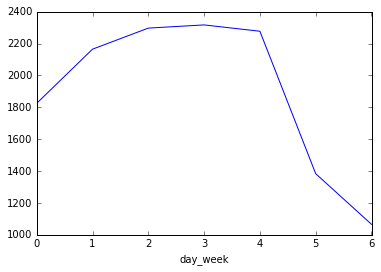

In [11]:
%pylab inline

(grouped_subway['ENTRIESn_hourly'].mean()).plot()

[Back to top](#Top of document)
<a id='quiz12'></a>

## Calculating Hourly Entries and Exits - Quiz 12

### Using groupby() to Calculate Hourly Entries and Exits
In the quiz where you calculated hourly entries and exits, you did so for a single set of cumulative entries. However, in the original data, there was a separate set of numbers for each station.
Thus, to correctly calculate the hourly entries and exits, it was necessary to group by station and day, then calculate the hourly entries and exits within each day.
Write a function to do that. You should use the apply() function to call the function you wrote previously. You should also make sure you restrict your grouped data to just the entries and exits columns, since your function may cause an error if it is called on non-numerical data types.
If you would like to learn more about using groupby() in Pandas, [this page](http://pandas.pydata.org/pandas-docs/stable/groupby.html) contains more details.
Note: You will not be able to reproduce the ENTRIESn_hourly and EXITSn_hourly columns in the full dataset using this method. When creating the dataset, we did extra processing to remove erroneous values.

In [13]:
import numpy as np
import pandas as pd

values = np.array([1, 3, 2, 4, 1, 6, 4])
example_df = pd.DataFrame({
    'value': values,
    'even': values % 2 == 0,
    'above_three': values > 3 
}, index=['a', 'b', 'c', 'd', 'e', 'f', 'g'])

In [14]:
# Standardize each group
def standardize(xs):
    return( (xs - xs.mean()) / xs.std())
grouped_data = example_df.groupby('even')
print(grouped_data['value'].apply(standardize))

a   -0.577350
b    1.154701
c   -1.224745
d    0.000000
e   -0.577350
f    1.224745
g    0.000000
dtype: float64


In [15]:
# Find second largest value in each group
def second_largest(xs):
    sorted_xs = xs.sort_values(inplace=False, ascending=False)
    return(sorted_xs.iloc[1])
grouped_data = example_df.groupby('even')
print(grouped_data['value'].apply(second_largest))

even
False    1
True     4
Name: value, dtype: int64


In [16]:
ridership_df = pd.DataFrame({
    'UNIT': ['R051', 'R079', 'R051', 'R079', 'R051', 'R079', 'R051', 'R079', 'R051'],
    'TIMEn': ['00:00:00', '02:00:00', '04:00:00', '06:00:00', '08:00:00', '10:00:00', '12:00:00', '14:00:00', '16:00:00'],
    'ENTRIESn': [3144312, 8936644, 3144335, 8936658, 3144353, 8936687, 3144424, 8936819, 3144594],
    'EXITSn': [1088151, 13755385,  1088159, 13755393,  1088177, 13755598, 1088231, 13756191,  1088275]
})

print(ridership_df)
print('\n')
print(ridership_df[['ENTRIESn', 'EXITSn']])

   ENTRIESn    EXITSn     TIMEn  UNIT
0   3144312   1088151  00:00:00  R051
1   8936644  13755385  02:00:00  R079
2   3144335   1088159  04:00:00  R051
3   8936658  13755393  06:00:00  R079
4   3144353   1088177  08:00:00  R051
5   8936687  13755598  10:00:00  R079
6   3144424   1088231  12:00:00  R051
7   8936819  13756191  14:00:00  R079
8   3144594   1088275  16:00:00  R051


   ENTRIESn    EXITSn
0   3144312   1088151
1   8936644  13755385
2   3144335   1088159
3   8936658  13755393
4   3144353   1088177
5   8936687  13755598
6   3144424   1088231
7   8936819  13756191
8   3144594   1088275


<a id='solquiz12a'></a>

## Solution A

In [17]:
grouped_unit = ridership_df.groupby('UNIT')
print(grouped_unit.groups)

{'R051': [0L, 2L, 4L, 6L, 8L], 'R079': [1L, 3L, 5L, 7L]}


In [18]:
def get_hourly_entries_and_exits(entries_and_exits):
    """
    Fill in this function to take a DataFrame with cumulative entries
    and exits (entries in the first column, exits in the second) and
    return a DataFrame with hourly entries and exits (entries in the
    first column, exits in the second).
    """
    
    hourly = entries_and_exits - entries_and_exits.shift()
    
    return(hourly)

# print(get_hourly_entries_and_exits(entries_and_exits))

In [19]:
print(get_hourly_entries_and_exits(ridership_df[['ENTRIESn', 'EXITSn']]))
print('\n')
print(grouped_unit[['ENTRIESn', 'EXITSn']].apply(get_hourly_entries_and_exits))

    ENTRIESn      EXITSn
0        NaN         NaN
1  5792332.0  12667234.0
2 -5792309.0 -12667226.0
3  5792323.0  12667234.0
4 -5792305.0 -12667216.0
5  5792334.0  12667421.0
6 -5792263.0 -12667367.0
7  5792395.0  12667960.0
8 -5792225.0 -12667916.0


   ENTRIESn  EXITSn
0       NaN     NaN
1       NaN     NaN
2      23.0     8.0
3      14.0     8.0
4      18.0    18.0
5      29.0   205.0
6      71.0    54.0
7     132.0   593.0
8     170.0    44.0


<a id='solquiz12b'></a>

## Solution B

In [20]:
def get_hourly_entries_and_exits(entries_and_exits):
    '''
    Fill in this function to take a DataFrame with cumulative entries
    and exits and return a DataFrame with hourly entries and exits.
    The hourly entries and exits should be calculated separately for
    each station (the 'UNIT' column).
    '''
    return(entries_and_exits - entries_and_exits.shift(1))

grouped_unit = ridership_df.groupby('UNIT')
print(grouped_unit[['ENTRIESn', 'EXITSn']].apply(get_hourly_entries_and_exits))

   ENTRIESn  EXITSn
0       NaN     NaN
1       NaN     NaN
2      23.0     8.0
3      14.0     8.0
4      18.0    18.0
5      29.0   205.0
6      71.0    54.0
7     132.0   593.0
8     170.0    44.0


<a id='instsolquiz12'></a>

## Solution required to pass the grader

In [40]:
def hourly_entries_exits(series):
    return(series - series.shift(1))

def get_hourly_entries_and_exits(series):
    return(series.groupby('UNIT')[['ENTRIESn', 'EXITSn']].apply(hourly_entries_exits))

[Back to top](#Top of document)
<a id='quiz13'></a>

## Combining Pandas DataFrames - Quiz 13

[pandas.DataFrame.merge](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.merge.html)

```python
submissions.merge(enrollments, on='account_key', how='left')

subway.df.merge(weather.df,
		left_on=['DATAn', 'hour', 'latitude', 'longitude'],
		right_on=['date','hour', 'latitude', 'longitude'],
		how='inner'
```

### left_on and right_on may both be specified if the columns have differing names


![alt text](https://github.com/trenton3983/UDACITY/blob/master/01_Data_Analyst/02_Data_Analysis/L3/Images/Combining%20Pandas%20DataFrames%201%20Quiz%2013.JPG?raw=true)

In [3]:
import pandas as pd

subway_df = pd.DataFrame({
    'UNIT': ['R003', 'R003', 'R003', 'R003', 'R003', 'R004', 'R004', 'R004',
             'R004', 'R004'],
    'DATEn': ['05-01-11', '05-02-11', '05-03-11', '05-04-11', '05-05-11',
              '05-01-11', '05-02-11', '05-03-11', '05-04-11', '05-05-11'],
    'hour': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'ENTRIESn': [ 4388333,  4388348,  4389885,  4391507,  4393043, 14656120,
                 14656174, 14660126, 14664247, 14668301],
    'EXITSn': [ 2911002,  2911036,  2912127,  2913223,  2914284, 14451774,
               14451851, 14454734, 14457780, 14460818],
    'latitude': [ 40.689945,  40.689945,  40.689945,  40.689945,  40.689945,
                  40.69132 ,  40.69132 ,  40.69132 ,  40.69132 ,  40.69132 ],
    'longitude': [-73.872564, -73.872564, -73.872564, -73.872564, -73.872564,
                  -73.867135, -73.867135, -73.867135, -73.867135, -73.867135]
})

In [4]:
weather_df = pd.DataFrame({
    'DATEn': ['05-01-11', '05-01-11', '05-02-11', '05-02-11', '05-03-11',
              '05-03-11', '05-04-11', '05-04-11', '05-05-11', '05-05-11'],
    'hour': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'latitude': [ 40.689945,  40.69132 ,  40.689945,  40.69132 ,  40.689945,
                  40.69132 ,  40.689945,  40.69132 ,  40.689945,  40.69132 ],
    'longitude': [-73.872564, -73.867135, -73.872564, -73.867135, -73.872564,
                  -73.867135, -73.872564, -73.867135, -73.872564, -73.867135],
    'pressurei': [ 30.24,  30.24,  30.32,  30.32,  30.14,  30.14,  29.98,  29.98,
                   30.01,  30.01],
    'fog': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'rain': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'tempi': [ 52. ,  52. ,  48.9,  48.9,  54. ,  54. ,  57.2,  57.2,  48.9,  48.9],
    'wspdi': [  8.1,   8.1,   6.9,   6.9,   3.5,   3.5,  15. ,  15. ,  15. ,  15. ]
})

<a id='solquiz13'></a>

## Solution

In [5]:
def combine_dfs(subway_df, weather_df):
    """
    Fill in this function to take 2 DataFrames, one with subway data and one with weather data,
    and return a single dataframe with one row for each date, hour, and location. Only include
    times and locations that have both subway data and weather data available.
    """
    return weather_df.merge(subway_df, on=['DATEn', 'hour', 'latitude', 'longitude'], how='inner')

In [6]:
print(combine_dfs(subway_df, weather_df))

      DATEn  fog  hour   latitude  longitude  pressurei  rain  tempi  wspdi  \
0  05-01-11    0     0  40.689945 -73.872564      30.24     0   52.0    8.1   
1  05-01-11    0     0  40.691320 -73.867135      30.24     0   52.0    8.1   
2  05-02-11    0     0  40.689945 -73.872564      30.32     0   48.9    6.9   
3  05-02-11    0     0  40.691320 -73.867135      30.32     0   48.9    6.9   
4  05-03-11    0     0  40.689945 -73.872564      30.14     0   54.0    3.5   
5  05-03-11    0     0  40.691320 -73.867135      30.14     0   54.0    3.5   
6  05-04-11    0     0  40.689945 -73.872564      29.98     0   57.2   15.0   
7  05-04-11    0     0  40.691320 -73.867135      29.98     0   57.2   15.0   
8  05-05-11    0     0  40.689945 -73.872564      30.01     0   48.9   15.0   
9  05-05-11    0     0  40.691320 -73.867135      30.01     0   48.9   15.0   

   ENTRIESn    EXITSn  UNIT  
0   4388333   2911002  R003  
1  14656120  14451774  R004  
2   4388348   2911036  R003  
3  1465617

[Back to top](#Top of document)
<a id='quiz14'></a>

## Plotting for DataFrames - Quiz 14

Just like Pandas Series, DataFrames also have a plot() method. If df is a DataFrame, then df.plot() will produce a line plot with a different colored line for each variable in the DataFrame. This can be a convenient way to get a quick look at your data, especially for small DataFrames, but for more complicated plots you will usually want to use matplotlib directly.

In the following quiz, create a plot of your choice showing something interesting about the New York subway data. For example, you might create:

* Histograms of subway ridership on both days with rain and days without rain
* A scatterplot of subway stations with latitude and longitude as the x and y axes and ridership as the bubble size
  * If you choose this option, you may wish to use the ```as_index=False``` argument to groupby(). There is example code in the following quiz.
* A scatterplot with subway ridership on one axis and precipitation or temperature on the other

If you're not sure how to make the plot you want, try searching on Google or take a look at the [matplotlib documentation](http://matplotlib.org/api/pyplot_api.html). Once you've created a plot you're happy with, share what you've found on the forums!

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

values = np.array([1, 3, 2, 4, 1, 6, 4])
example_df = pd.DataFrame({
    'value': values,
    'even': values % 2 == 0,
    'above_three': values > 3 
}, index=['a', 'b', 'c', 'd', 'e', 'f', 'g'])
print(example_df)

  above_three   even  value
a       False  False      1
b       False  False      3
c       False   True      2
d        True   True      4
e       False  False      1
f        True   True      6
g        True   True      4


In [3]:
# groupby() without as_index
first_even = example_df.groupby('even').first()
print first_even
# print first_even['even']  # Causes an error. 'even' is no longer a column in the DataFrame

      above_three  value
even                    
False       False      1
True        False      2


In [4]:
# groupby() with as_index=False
print example_df.groupby('even', as_index=False).first()
print example_df['even'] # Now 'even' is still a column in the DataFrame

    even above_three  value
0  False       False      1
1   True       False      2
a    False
b    False
c     True
d     True
e    False
f     True
g     True
Name: even, dtype: bool


In [5]:
# Provide your own path
data_path = ('E:/Users/Trenton J. McKinney/PycharmProjects/'
              'UDACITY/01_Data_Analyst/02_Data_Analysis/L3/')
subway_df = pd.read_csv(data_path + 'nyc_subway_weather.csv')

print(subway_df.head())

   UNIT     DATEn     TIMEn  ENTRIESn   EXITSn  ENTRIESn_hourly  \
0  R003  05-01-11  00:00:00   4388333  2911002              0.0   
1  R003  05-01-11  04:00:00   4388333  2911002              0.0   
2  R003  05-01-11  12:00:00   4388333  2911002              0.0   
3  R003  05-01-11  16:00:00   4388333  2911002              0.0   
4  R003  05-01-11  20:00:00   4388333  2911002              0.0   

   EXITSn_hourly             datetime  hour  day_week     ...       pressurei  \
0            0.0  2011-05-01 00:00:00     0         6     ...           30.22   
1            0.0  2011-05-01 04:00:00     4         6     ...           30.25   
2            0.0  2011-05-01 12:00:00    12         6     ...           30.28   
3            0.0  2011-05-01 16:00:00    16         6     ...           30.26   
4            0.0  2011-05-01 20:00:00    20         6     ...           30.28   

  rain  tempi  wspdi meanprecipi  meanpressurei  meantempi  meanwspdi  \
0    0   55.9    3.5         0.0     

In [6]:
test_group = subway_df.groupby(['latitude', 'longitude', 'ENTRIESn', 'EXITSn', 'DATEn'], as_index=False)
print(test_group.first().head())

    latitude  longitude  ENTRIESn  EXITSn     DATEn  UNIT     TIMEn  \
0  40.576152 -73.975925    296620   29270  05-05-11  R312  16:00:00   
1  40.576152 -73.975925    912105  159936  05-01-11  R312  08:00:00   
2  40.576152 -73.975925    915005  160301  05-05-11  R312  08:00:00   
3  40.576152 -73.975925    925179  161840  05-20-11  R312  08:00:00   
4  40.576152 -73.975925    925725  161945  05-21-11  R312  08:00:00   

   ENTRIESn_hourly  EXITSn_hourly             datetime     ...       \
0             44.0           10.0  2011-05-05 16:00:00     ...        
1             31.0            4.0  2011-05-01 08:00:00     ...        
2            254.0            7.0  2011-05-05 08:00:00     ...        
3            248.0           10.0  2011-05-20 08:00:00     ...        
4             43.0            2.0  2011-05-21 08:00:00     ...        

   pressurei  rain  tempi wspdi meanprecipi  meanpressurei  meantempi  \
0      29.89     0   63.0  10.4    0.000000      29.956667  55.316667   


In [7]:
data_by_loc = subway_df.groupby(['latitude', 'longitude'], as_index=False).mean()
print(data_by_loc.head())

    latitude  longitude      ENTRIESn        EXITSn  ENTRIESn_hourly  \
0  40.576152 -73.975925  9.659049e+06  8.641132e+06       403.896175   
1  40.576298 -73.968523  8.306897e+06  6.646823e+06       526.697297   
2  40.577961 -73.961806  4.552910e+07  4.612408e+07      1950.295699   
3  40.589547 -73.974295  7.268214e+06  7.961334e+06       485.382353   
4  40.590867 -73.797011  6.477945e+06  5.994957e+06       500.725610   

   EXITSn_hourly       hour  day_week   weekday       fog     ...       \
0     325.956284  10.032787  2.907104  0.715847  0.010929     ...        
1     419.562162   9.989189  2.951351  0.708108  0.010811     ...        
2    1930.483871  10.000000  2.935484  0.709677  0.010753     ...        
3     362.941176  10.164706  2.905882  0.705882  0.011765     ...        
4     374.628049  10.097561  2.951220  0.719512  0.024390     ...        

   pressurei      rain      tempi     wspdi  meanprecipi  meanpressurei  \
0  29.972568  0.229508  63.383607  5.553005    

In [8]:
scaled_entries = (data_by_loc['ENTRIESn_hourly'] / data_by_loc['ENTRIESn_hourly'].std())

Populating the interactive namespace from numpy and matplotlib


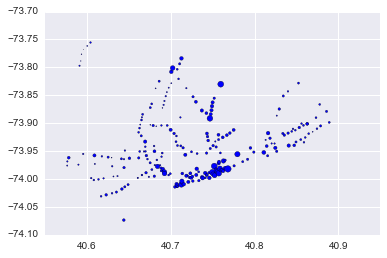

In [9]:
%pylab inline
plt.scatter("latitude", "longitude", data=data_by_loc, s=scaled_entries*7)
# plt.scatter(data_by_loc['latitude'], data_by_loc['longitude'])

[Back to top](#Top of document)
<a id='3d_data'></a>

## Three-Dimensional Data

Now that you've worked with one-dimensional and two-dimensional data, you might be wondering how to work with three or more dimensions.

**3D data in NumPy**
NumPy arrays can have arbitrarily many dimensions. Just like you can create a 1D array from a list, and a 2D array from a list of lists, you can create a 3D array from a list of lists of lists, and so on. For example, the following code would create a 3D array:

```python
a = np.array([
    [['A1a', 'A1b', A1c'], ['A2a', 'A2b', 'A2c']],
    [['B1a', 'B1b', 'B1c'], ['B2a', 'B2b', 'B2c']]
])
```
**3D data in Pandas**
Pandas has a data structure called a Panel, which is similar to a DataFrame or a Series, but for 3D data. If you would like, you can learn more about [Panels](http://pandas.pydata.org/pandas-docs/stable/dsintro.html#panel).